<a href="https://colab.research.google.com/github/sammiller11235/Aerospec-Data-Viz/blob/main/Project_Documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This document details the approach taken and resources used in developing the visualization dashboard for this project.

# AeroSpec Environmental Quality Monitoring Dashboard

### Sponsor: Sep Makhsous, AeroSpec
### Authors: Sam Miller, Sreeja Vishaly, Bianca Zlavog
### University of Washington, MSDS Capstone Project 2021

Dashboard Link: https://aerospec-dashboard.herokuapp.com/

#### Project summary
[AeroSpec](https://www.aerospec.io/) is a UW-based startup which designs and calibrates sensors to measure local air quality, noise, temperature, and other environmental data in real time. This product allows users in commercial and industrial settings to effectively manage environmental hazards, mitigate the health impacts of these factors, and maintain the safety of their facilities. Our project goal was to create a data visualization concept and prototype for AeroSpec’s user interface. The aim was to display the data collected by sensors to users in a clear and interpretable way, leveraging effective visual design principles. We produced a visualization dashboard to be utilized in upcoming product demos and pilot studies in dental offices and manufacturing plants. 

# Design requirements

## Functional Requirements
* Visualization dashboard written in Python and deployed via a cloud platform
* The dashboard will have the ability to display:
  * Metrics on particulate matter, particle size, density, location, and overall air quality
  * Metrics on noise, temperature, and humidity
  * Summary statistics for each sensor
  * At-a-glance representation of current environmental quality across the field of interest
  * Data from multiple sensors
    * Represented in their spatial locations
    * Represented in a list view
    * Including a representation of the most recent sensor measurements
    * Including a representation of the sensor data over a time range
  * Time series data, including real-time values
  * Select different time ranges
  * Sort or filter sensors from the visual display
* The ability to drill down to explore:
  * A particular sensor data in detail
  * A particular time range
  * A particular spatial domain
* The visualization interface should be able to add or remove sensors 
* The dashboard can be adapted to different spatial domains of arbitrary size
* Supports missing data when sensors are offline
* Ability to represent stationary sensor location and to manually alter the sensor location.
* Ability to represent the spatial domain pictorially, for example a building layout schematic or blueprint 
* The ability to resize or change the visualization spacing and layout dynamically is not required

## Performance Requirements
* Ability to display up to 1 GB of data without substantial slowdown
  * 1GB data = 12.4M tuples = 3.92 years of 1 sensor recording at 10sec intervals, or 20.4 weeks of 10 sensors, or 14 days of 100 sensors, 1.4 days of 1000 sensors
* Ability to dynamically update visualization as new data is generated
* Low latency, on the order < 1 seconds for updating visualizations

## Desired Attributes
* Dynamic dashboard will be created to provide real time information based on the update made to the data source. This can be achieved using streaming data.
* Data will be stored in a suitable cloud datastore (such as S3, RDS) which will enable seamless integration of the data source with the dashboard.
* Tools will be used to track performance of the dashboard. The dashboard will emit metrics and alarms will be created on the same to notify on any concerning failures on the dashboard performance
* Ability to create snap-shots of the dashboard and output to a static file for reporting
* Logging of user interactions, data updates, and error handling
Software written in accordance with PEP8 style guide

## Required Documentation
* A report including:
  * Write-up of design process: Five Design-Sheets Methodology
  * Description of design choices made and effective design principles applied: Mackinlay’s visual design criteria and Tufte’s principles of graphical excellence. 
  * A software design index describing features
  * Description of limitations and recommended future improvements
* Software documented in-line 
* Resources used during the workflow

# Design Process

### Visual representation of data

After exploring the sample sensor data provided to us, our team began identifying the variables of interest. These included the timestamp of the collected data, location of sensors, and continuous environmental quality parameters such as particulate matter, noise, temperature, humidity, and pressure. We explored the types of visual representations that were most effective and accurate for continuous, time series, spatial data, drawing on design principles from leading data visualization experts including [Mackinlay’s visual design criteria](https://dl.acm.org/doi/book/10.5555/300679) and [Tufte’s principles of graphical excellence](https://www.edwardtufte.com/tufte/books_vdqi), as detailed in our [design presentation](https://docs.google.com/presentation/d/103YxJj7ukDCU39JGThVGIvPOvDkcZDoddsPFIBwdyd0/edit?usp=sharing) shared with the AeroSpec team. Related types of visualizations we explored included stock market data, weather data, air quality websites, geospatial data, and other industrial monitoring dashboards.

### Five Design Sheets Methodology

Our team employed the [Five Design Sheets Methodology](http://fds.design/index.php/resources-and-publications/) to iteratively develop our visualization design concept. Drawing on our analysis of effective visual encodings for the data, we brainstormed initial ideas as part of the first design sheet. After collectively reviewing and discussing the qualities of our first sketches, each team member produced a design sheet bringing together multiple figures into a complete dashboard design. For the last design sheet, we then compiled and refined our individual designs into a final concept. All design sketches produced as part of this process are available in the repository within the [sketches directory](https://github.com/sammiller11235/Aerospec-Data-Viz/tree/main/sketches). This design was shared with the AeroSpec team to obtain additional feedback, before beginning development on a coded implementation of the dashboard.

### Two-tab view

Through the design process, we came against the question of what type of data the user may be most interested in: 
* All sensor readings of one particular parameter (e.g., PM in a dentistry office)
* All data captured by one sensor across multiple parameters (e.g., general environmental quality)

Depending on the use case, either one of these options may be more helpful for users to obtain the data they need, and different types of visualizations would better suited to each. Therefore, we made the design decision to display the dashboard data across two views, each focusing on one of these ways of querying the data. The Overview tab shows data for one parameter across multiple sensors and includes a Overview panel, Map view, and List view of the data, while the Sensors tab prioritizes time series data for a sensor across multiple parameters.

### Environmental limits

This dashboard incorporates environmental limits, which are important to users trying to maintain safe conditions in their facilities, as a key design element. While the environmental data measured by sensors is continuous, we bin these values into several ordinal categories of environmental quality, to help users contextualize the data and make decisions to protect their health. We use the encoding of color to indicate the various levels of environmental quality. 

Standards have been set by the US government to denote these different levels of quality for air particulate matter and occupational noise. For our dashboard, we have set the default limits based on these standards. The default limits can be modified by the user within the dashboard, since different applications may require custom limits. The default colors displayed can also be changed, in order to provide flexibility for colorblind users.

### Air quality

The [US Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) defines the following  standards of air quality for pollutants such as particulate matter. We use the values and colors outlined below as default environmental limits for all PM and Dp measurements captured by sensors.

| Color | Level of Concern | Values of Index | Description of Air Quality|
| --- | --- | --- | --- |
| Green | 	Good | 	0 to 50|  	Air quality is satisfactory, and air pollution poses little or no risk.| 
| Yellow|  	Moderate | 	51 to 100 | 	Air quality is acceptable. However, there may be a risk for some people, particularly those who are unusually sensitive to air pollution.| 
| Orange | 	Unhealthy for Sensitive Groups|  	101 to 150|  	Members of sensitive groups may experience health effects. The general public is less likely to be affected.| 
| Red | 	Unhealthy | 	151 to 200| 	Some members of the general public may experience health effects; members of sensitive groups may experience more serious health effects.| 
| Purple | 	Very Unhealthy | 	201 to 300 |	Health alert: The risk of health effects is increased for everyone.| 
| Maroon | 	Hazardous | 	301 and higher | 	Health warning of emergency conditions: everyone is more likely to be affected.| 

### Noise
Occupational noise limits have been [set by OSHA](https://www.osha.gov/laws-regs/regulations/standardnumber/1910/1910.95) by a time-weighted average of exposure, as outlined in the below table.

1910.95(b)(1): When employees are subjected to sound exceeding those listed in Table G-16, feasible administrative or engineering controls shall be utilized. If such controls fail to reduce sound levels within the levels of Table G-16, personal protective equipment shall be provided and used to reduce sound levels within the levels of the table.

1910.95(b)(2): TABLE G-16 - PERMISSIBLE NOISE EXPOSURES (1)

|  Duration per day, hours   | Sound level dBA slow response |
| --- | --- |
8|90
6|92
4|95
3|97
2|100
1 1/2|102
1|105
1/2 |110
1/4  or less|115

As default environmental limits for noise, we used the same categories as for air quality. This design choice places more focus on the health risks posed by instantaneous spikes in noise levels. However, an alternate metric of interest to users following OSHA regulation would be the time-weighted average value measured by sensors. Alternate designs could display first-shift and second-shift average noise values as a horizontal line in the line charts in sensor view, or as a bar graph showing proportion of the time-weighted allowable limits, as shown below.

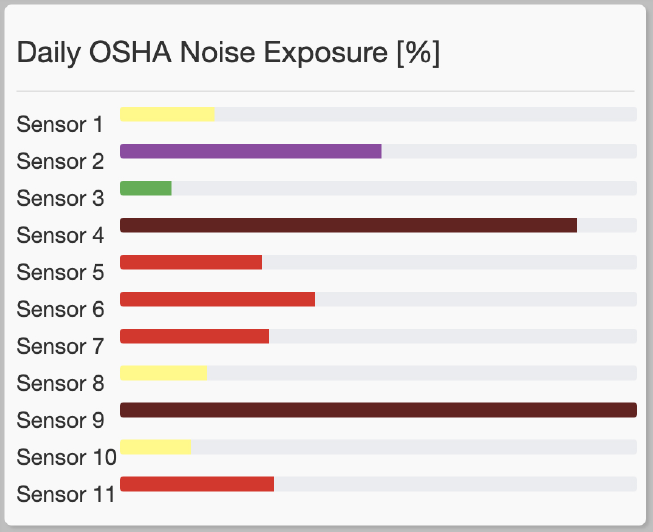

### Other parameters
Environmental limits for temperature, humidity, and air pressure, are dependent on individual use cases. A user targeting certain ranges of values can set these as needed, using the default categories of "Low", "Normal", and "High" that are included in our design. The color scale employed in this case simply uses two colors, creating an easy-to-understand binary visual indicator of the environmental quality measurement.

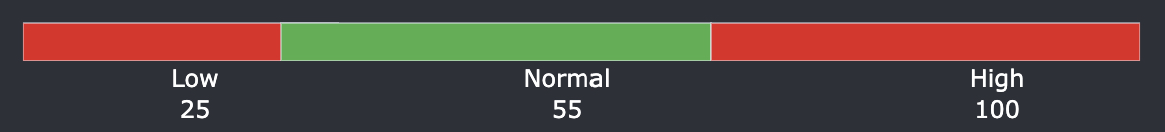

### Overview panel

This panel aims to provide a high-level overview of data across all sensors for the selected parameter. The average quality across all sensors is denoted in words, and the number of sensors exceeding safe limits is shown as a warning. A bar chart displays the color representing the environmental quality for each sensor, allowing users to visually estimate the proportion of sensors at each quality level. If this bar is completely green, then users will know that all sensor data are within healthy ranges, whereas if any red is present, they will be able to further investigate sensors that have a high reading. Alternate implementations of this figure may use a pie chart or donut chart, but in terms of visual design principles, a bar chart uses the encoding of length and is more interpretable than a figure that uses the encoding of area.

This design allows users to detect at-a-glance the most important feature of the data, whether current environmental quality is within safe limits, and enables users to decide whether or not they need to drill down further into the data presented in the rest of the dashboard.

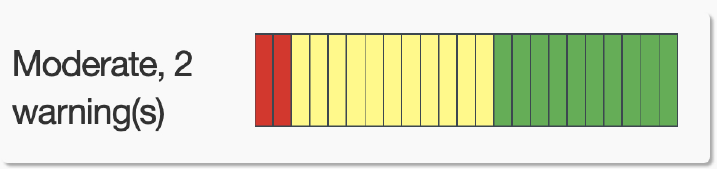

### Notifications

We implemented a panel to display [push notifications](https://dash-bootstrap-components.opensource.faculty.ai/docs/components/toast/) when environmental limits were exceeded. This allows users to quickly identify which sensors are raising this warning, and take actions accordingly to protect their health.

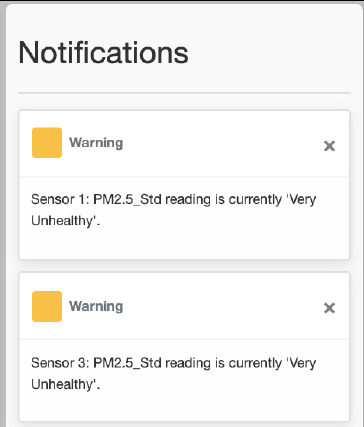

### Map view

To allow users to identify which sensor corresponds to which area of their facility, we display the sensors on a map of the building floorplan. Map views showing location of sensors are a common feature in competitors' air quality monitoring dashboards (examples [here](https://www.iqair.com/us/) and [here](https://www.purpleair.com/map?opt=1/mAQI/a10/cC0#11/47.6631/-122.3029)), and are straightforward for users to comprehend. Each circle on the map represents a sensor, and the color of the circle corresponds to its current environmental quality measurement. Users can hover over the circles to see the sensor name and current value, and can zoom and pan across the map figure. This figure allows users to connect the sensor names used throughout the dashboard to where in the facility the sensors are located. It can also reveal spatial trends in environmental quality; for example, one area may consistently have poorer quality and can be targeted for safety interventions.

Currently, the sensor placement and map image used are placeholders. A new floorplan image can be uploaded in the Settings tab, however, the sensors cannot be manually dragged to a new location on the figure, which is a feature that could be added in the future. It will be important for users to be able to easily upload floorplan images and add, remove, or modify sensors within this view, so more work is needed to develop the interface to enable this.

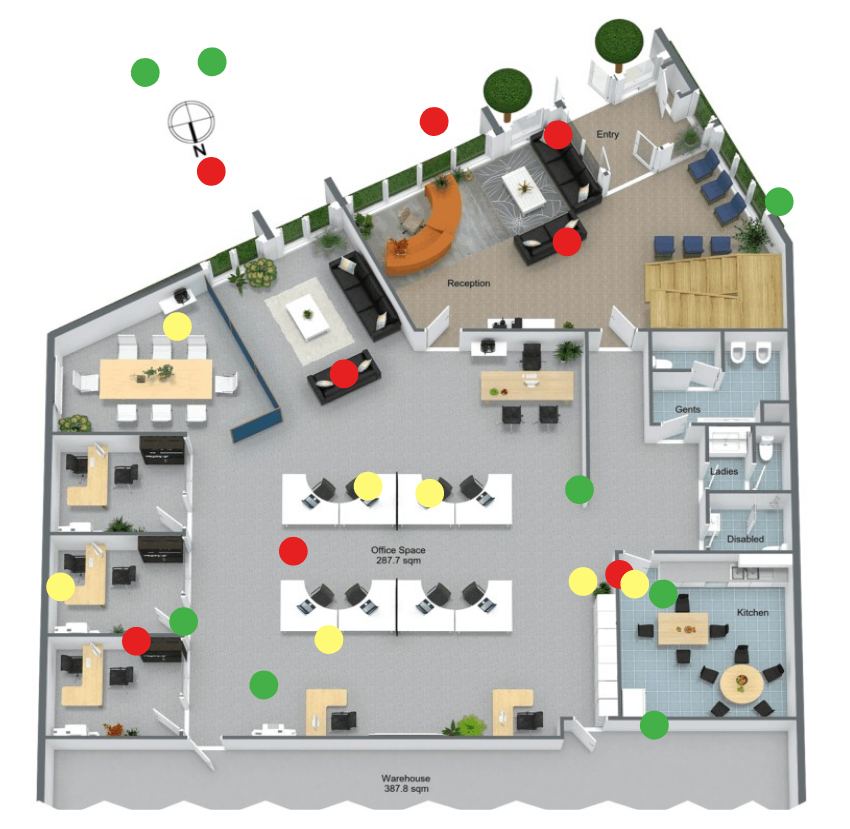

### List view

This panel tabulates the data captured by all sensors across a given time period and displays key statistics, including current value, maximum and minimum values, and average quality. This allows users to obtain summary statistics over a time period of interest.

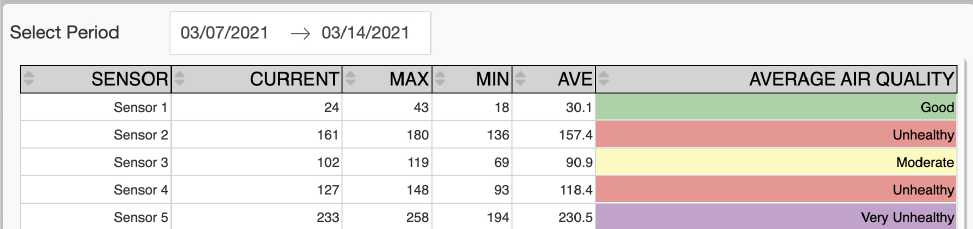

### Sensor view

This view focuses on displaying the time series data measured by one or more sensors, across multiple parameters.

The main figure is a line graph showing the time and measured values. The most recent measurements are on the right side of the figure, and the y-axis scale is also on the right, visually directing the eye toward the most recent measurements. The figure background displays colored bands corresponding to each environmental quality category. To the left of this figure is a horizontal histogram displaying the number of observations within each quality range, allowing users to see the relative frequency of time that measurements were observed in each quality category.

This view enables the selection of multiple sensors at a time, allowing users to compare values observed by different sensors. There is also a button allowing users to pause the streaming of new data in order to focus in on historical data. When paused, the time series data can be explored by clicking and dragging, zooming, panning, or using one of the time period selection buttons to display a subset of the temporal data. Exact values at a point in time can be obtained by hovering over the lines.



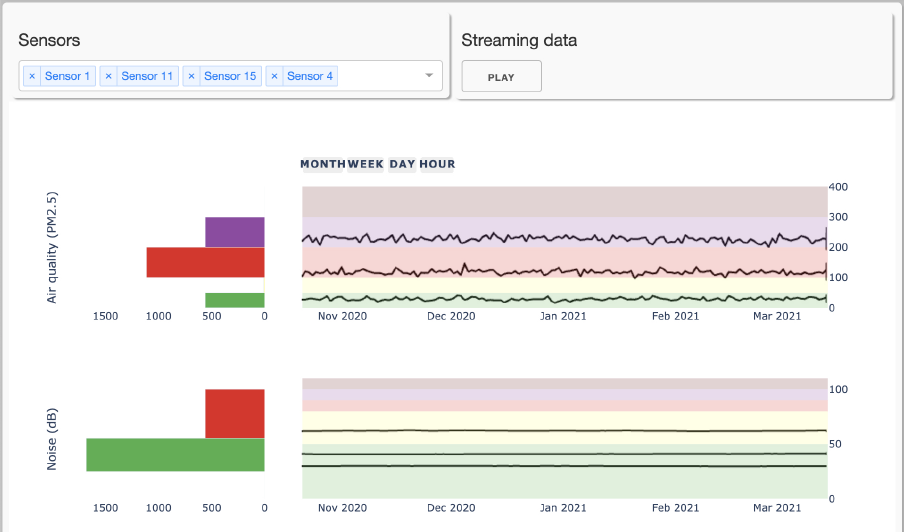

### Calendar heatmap

This figure shows time trends in environmental quality, with each square of the "calendar" representing a date, and the color of the square denoting the average quality accordingly. This allows for a very high-level view of daily quality, and enables users to potentially find time patterns in their data, for example one month or one particular weekday of a year may have consistently poor quality.

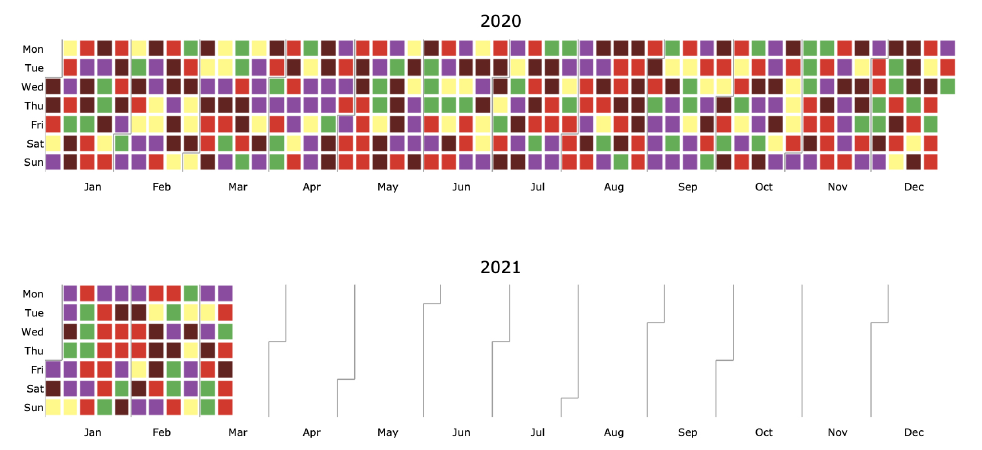

# Software Documentation

### Software used

We used the [Python version](https://github.com/sammiller11235/Aerospec-Data-Viz/blob/main/runtime.txt) and [package versions](https://github.com/sammiller11235/Aerospec-Data-Viz/blob/main/requirements.txt) documented in the repository.

The primary data visualization package used was [plotly](https://plotly.com/python/reference/), and the dashboard was built using [Dash](https://www.datacamp.com/community/tutorials/learn-build-dash-python) and deployed to a cloud server via [Heroku](https://devcenter.heroku.com/articles/getting-started-with-python).


Software engineering principles leveraged from our [Software Engineering course](https://github.com/UWSEDS/LectureNotes) include use of objects, methods, and modules, [PEP8 style guidelines](https://www.python.org/dev/peps/pep-0008/), and [version control via Git](https://git-scm.com/).




### Data

Data currently visible in the dashboard was obtained from pilot studies, and processed using the [included script](https://github.com/sammiller11235/Aerospec-Data-Viz/blob/main/data/Clean_data.ipynb). The clean data was then sampled and used to generate a new dataset simulating the collection of data in real time. The method used to create this dataset is described in the [respective file](https://github.com/sammiller11235/Aerospec-Data-Viz/blob/main/data/InterestingWF/INFO.txt). The data contains various attributes denoting the environmental quality measured by the sensors at a particular time. This includes timestamp, temperature, humidity, pressure, altitude, noise, and particle counts and concentrations by size.

### Files

This repository is structured such that the code producing the elements of the main app are located at the root level of the repository. Besides the main `app.py` script, supporting scripts to load and process data and generate figures are available in this directory. The `assets` directory contains sample image files as well as a [style.css](https://github.com/sammiller11235/Aerospec-Data-Viz/blob/main/assets/style.css) file which sets styles used in the dashboard. The `data` folder contains the cleaned data used in the application demo. The `sketches` folder contains design sketches.
<details>
  <summary>Repository structure</summary>

.

├── *Project_Documentation.ipynb* - main documentation on dashboard

├── *Procfile*


├── *README.md* - reporsitory readme file

├── *app.py* - main file containing the settings for dash appy

├── *assets/* - contains css components

├── *banner.py* - contains metheds to provide banners for the dashboard

├── *data/* - folder which contains the main data

├── *data.py* - contains data loaded class to load, preprocess and manipulate data

├── *figures.py* - contains code to generate various visualization figues seens on dashboard

├── *layouts.py* - contains the different components and structural characteristics in the dashboard

├── *load_data.py* - containes helper methods to load data

├── *notifications.py* - contains code to generate notification panel on the main page in dashboard

├── *requirements.txt* - delineates the software package required of the project

├── *runtime.txt* - contains python version used

├── *settings.json* - provides default configurations and thresholds used in the dashbord

├── *sketches/* - prototype sketches of the project

├── *summary.py* - contains validate and indicator components

├── *tables.py* - contains ListViewTableObj to store and manipulate table data

└── *widgets.py* - contains wrappers for widget bars and dash components
</details>

### App code

The dashboard is contructed from nested html components within a overall block (div) component. The main layout has a banner at the top and a tabs component, with the app content within. The content is updated based on the selected tab. The layout of the content is defined using a generalized [row and column formatting](https://dash-bootstrap-components.opensource.faculty.ai/docs/components/layout/). The row and column formatting allows for easy manipulation of the layout, which will allow for futher customization for each specific use case. The layout can be further customized for different sized device displays. Dash components are used for user selections, such as the parameter dropdown and the sensor selection. Figures are defined as Plotly [graph objects](https://plotly.com/python/graph-objects/), residing within a single element of the layout structure. User interaction is enabled via callbacks, which are tied to the element id and component of that id which is changed. 

The data is stored within an object which contains a list of [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), as well as additional metadata. Currently, this object uses semi-synthetic data, based on a manipulations of a subset of the original data provided by the sponsor that contains the most interesting environmental conditions. There is a timer ([interval component](https://dash.plotly.com/dash-core-components/interval)) which triggers every 5 seconds to query an update of the data object. In the current implementation, a new value of the data is appended to each dataframe, based on the input that is referenced for that specific sensor. To implement streaming data from live sensors, this data object will require additional development to query the sensor data stored remotely. When the timer activates and updates the data, the figures are subsequently updated.

Each element used for a callback is connected via the element id. The [callbacks](https://dash.plotly.com/basic-callbacks) are defined based on function decorators which are a key element to the Dash functionality. Elements are styled based on the className which links to the CSS defintions (see assests\style.css). The main class for CSS styling is the "dashboard-component" which is effectively a "panel" of the overall layout. These panels are organized by the layout to produce the overall dashboard visualization. Key dashboard elements are listed below with the associated id and className for reference.




Key layout elements:

| Element | id | className |
| --- | --- | --- |
| Outer layout | "outer layout" |  |
| Banner | "banner" | app__header |
| Learn more button | "learn-more-button" | app_button |
| Settings button | "settings-button" | app_button |
| Tab Content | "app-content" |   |
| Tab Header | "app-tabs" | custom-tabs |
| Overview tab | "overview_tab" | dashboard-component |
| Sensors tab | "sensors_tab" | dashboard-component|

Key figure elements:

| Element | id |  Class |
| --- | --- | --- | 
| Map | "map-figure" | dcc.Graph |
| List Table | "list_table" | dash_table.DataTable |
| Line graph | "line-graph"  | dcc.Graph |
| Calendar graph | "calendar-heatmap" | dcc.Graph |
| Notifications | notifications | dashboard-component| 



Key background elements:

| Element | id | className |
| --- | --- | --- |
| Update timer | "interval-component" |  |
| Learn pop-up | "learn" | modal |
| Settings pop-up | "settings" | modal |


Key selection elements:

| Element | id | className |
| --- | --- | --- |
| Parameter dropdown | param-drop | dashboard-component  |
| Sensor item selection | sensors-selection |  dashboard-component |
| Sensor dropdown | sensor-drop| dashboard-component|
| Date picker | date-picker | dcc.DatePickerRange|




# Limitations and Future Work

Though our dashboard is comprehensive in detailing metrics that denote the overall air quality of a given location, a few limitations on the dashboard can be observerd. The Map view is hardcoded to use one floorplan figure and to randomly place sensors on the map, but needs further development to allow the user to set up their own sensors as needed. The List view in the dashboard provides filtering only based on data and not time, due to limitation in dash framework not providing out of box implementations for time picker. It would restrict a user in filtering the data based on time. Currently, a few elements in the dashboard are static, such as changing parameter limits in the Settings button, live notifications, and the calendar heatmap, and need to to update to sync up with changes to the data. The data itself needs to be linked to the sensors. It is expected that the current implementation can be easily modified to query the sensor data, such as via SQL queries to a database. For very large datasets, additional data engineering may be required to opimize the storage of the data used in each visualization. 

While we did not have time to conduct user testing, the AeroSpec team may want to solicit user feedback on the dashboard during product demos. Our design focused primarily on user needs in dental offices and industrial warehouse settings, but different applications may prioritize different data visualization needs. The dashboard may be modified or expanded on in the future to include additional capabilities and figures as needed. On the technical aspects, having a snapshot functionality to capture dashboard data at a given period of time will be very useful to capture data of interest and share it as required.

In an enterprise application, the input data for this dashboard will likely be captured in a cloud data warehouse. The dashboard would need to pull from this streaming data rather than the current static dataset that we have used for demonstration purposes. Finally, the performance of the dashboard may be slowed down by large amounts of data. Currently when a new datapoint is streamed, all figures in the dashboard must update, which causes some latency due to how Dash uses callbacks to update figures. Other more efficient and scaleable software implementations may be needed with larger input datasets.